Lets's put all the pieces together, and train a model

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

First we'll need training and test datasets

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)                                        

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)                                        
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False,num_workers=2)                                        

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')                                        

Files already downloaded and verified
Files already downloaded and verified


we'll run our check the output from DataLoader:

 deer truck   dog   dog


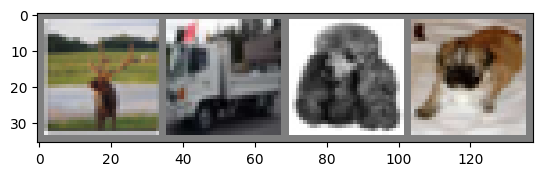

In [3]:
# function to show an image

def imshow(img):
    img = img / 2 + 0.5  # Unnormalized
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels 
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

This is the model we'll train. if it looks familiar, that's because it's a varient of LeNet adapted for 3-color images. 

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2 ,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

The last ingradients we need are a loss functional and an optimizer:

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The loss function is a measure of how far from our ideal output the model's prediction was. Cross-entropy loss is typically loss function for classification models.

The optimizer is what drives the learning. Here we have created an optimizer that implements stochastic gradient descent, one of the more straightforward optimization algorithms. Besides parameters of the algorithms, like the learning rate (lr) and momentum, we also pass in net.parameters(), which is a collection of all the learning weights in the model-which is what the optimizer adjusts.

Finally, all of this is assembled into the training loop. GO ahead and run this cell, as it will likely take a few minutes to execute:

In [6]:
for epoch in range(2): # loop over the dataset multilple time

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameters gradient
        optimizer.zero_grad()

        # forward + backword  + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini_batches
            print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finish Training')

[1,  2000] loss: 2.208
[1,  4000] loss: 1.831
[1,  6000] loss: 1.673
[1,  8000] loss: 1.570
[1, 10000] loss: 1.488
[1, 12000] loss: 1.472
[2,  2000] loss: 1.397
[2,  4000] loss: 1.377
[2,  6000] loss: 1.358
[2,  8000] loss: 1.347
[2, 10000] loss: 1.348
[2, 12000] loss: 1.297
Finish Training
